In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
from astropy import units as u

## Loading Mask

In [2]:
mask = hp.read_map('../data/Planck/mask/mask.fits')

0.0 180.0 -180.0 180.0


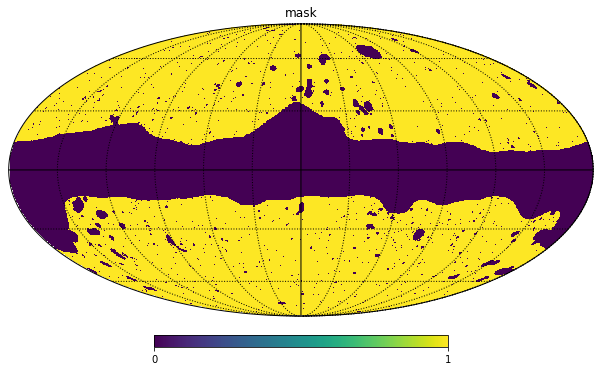

In [3]:
hp.mollview(mask, title='mask')
hp.graticule()

## Loading Map and Masking

In [3]:
dat = hp.read_alm('../data/Planck/MV/dat_klm.fits')

In [4]:
image = hp.sphtfunc.alm2map(dat, nside=2048, pol=False, fwhm=(1*u.arcmin).to(u.rad).value)
image_masked = hp.ma(image)
image_masked.mask = np.logical_not(mask)

0.0 180.0 -180.0 180.0


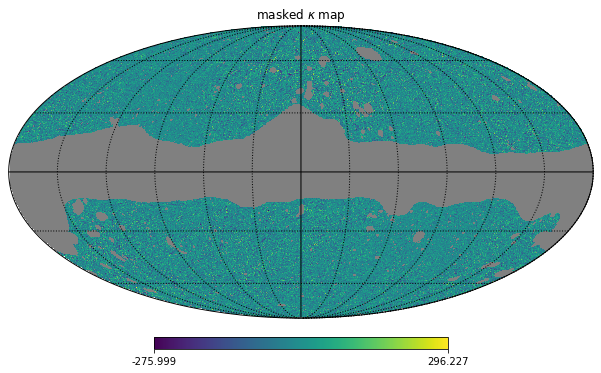

In [5]:
hp.mollview(image_masked.filled(), title='masked $\kappa$ map')
hp.graticule()

In [6]:
from astropy.io import fits

In [9]:
alm = fits.open('../data/Planck/MV/dat_klm.fits')

In [20]:
alm_dat = alm[1].data

0.0 180.0 -180.0 180.0


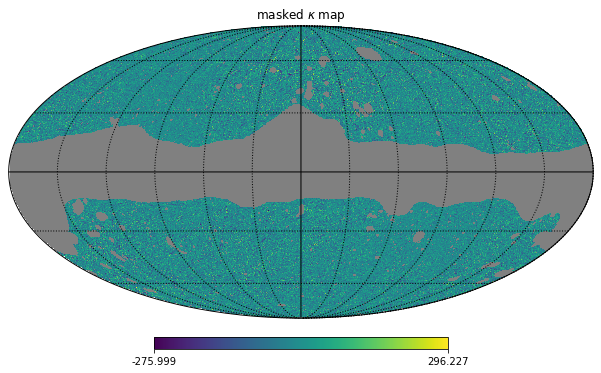

In [50]:
image = hp.sphtfunc.alm2map(hp.read_alm(alm), nside=2048, pol=False, fwhm=(1*u.arcmin).to(u.rad).value)
image_masked = hp.ma(image)
image_masked.mask = np.logical_not(mask)
hp.mollview(image_masked.filled(), title='masked $\kappa$ map')
hp.graticule()

## Query from a specific position

In [45]:
pos = hp.ang2vec(theta=np.pi/6, phi=0)

In [60]:
idx = hp.query_disc(nside=2048, vec=pos, radius=np.radians(1))

In [61]:
new_image = image_masked.copy()
new_image[idx] = new_image.max()

In [68]:
choose = np.zeros(image_masked.shape, bool)
choose[idx] = True
values = image_masked[idx]
values = values[np.logical_not(values.mask)].data

In [69]:
values.shape

(3750,)

0.0 180.0 -180.0 180.0


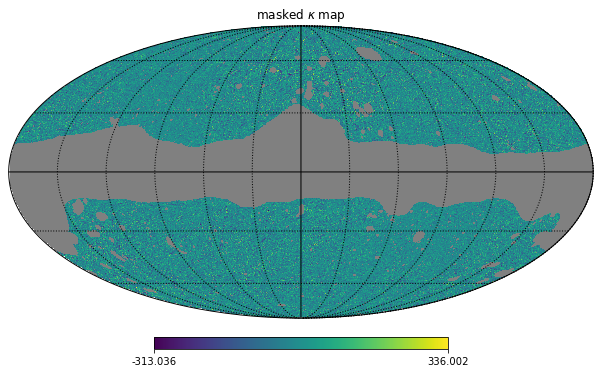

In [22]:
dat = hp.read_alm('../data/Planck/MV/dat_klm.fits')
image = hp.sphtfunc.alm2map(dat, nside=2048, pol=False)
image_masked = hp.ma(image)
image_masked.mask = np.logical_not(mask)
hp.mollview(image_masked.filled(), title='masked $\kappa$ map')
hp.graticule()

(array([1.1000000e+01, 2.9700000e+02, 1.5864000e+04, 6.5793600e+05,
        1.0519776e+07, 1.9493553e+07, 2.9653350e+06, 9.8951000e+04,
        2.1230000e+03, 4.8000000e+01]),
 array([-509.70524621, -412.3966519 , -315.08805758, -217.77946326,
        -120.47086894,  -23.16227462,   74.1463197 ,  171.45491402,
         268.76350834,  366.07210266,  463.38069698]),
 <BarContainer object of 10 artists>)

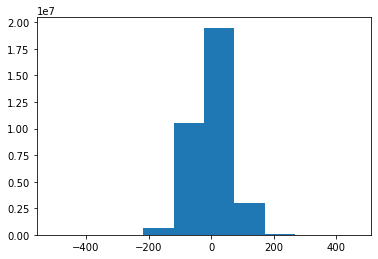

In [23]:
plt.hist(image[mask.astype(bool)])

## Switch to low resolution

In [3]:
mask_2 = hp.ud_grade(mask, 1024)

In [4]:
mask_2[mask_2>0.5] = 1
mask_2[mask_2<=0.5] = 0

In [7]:
image_2 = hp.sphtfunc.alm2map(dat, nside=1024, pol=False, fwhm=(1*u.arcmin).to(u.rad).value)
image_masked_2 = hp.ma(image_2)
image_masked_2.mask = np.logical_not(mask_2)

<>:1: SyntaxWarning: invalid escape sequence '\k'
<>:1: SyntaxWarning: invalid escape sequence '\k'
/tmp/ipykernel_1691441/1902563613.py:1: SyntaxWarning: invalid escape sequence '\k'
  hp.mollview(image_masked_2.filled(), title='masked $\kappa$ map(1024)')


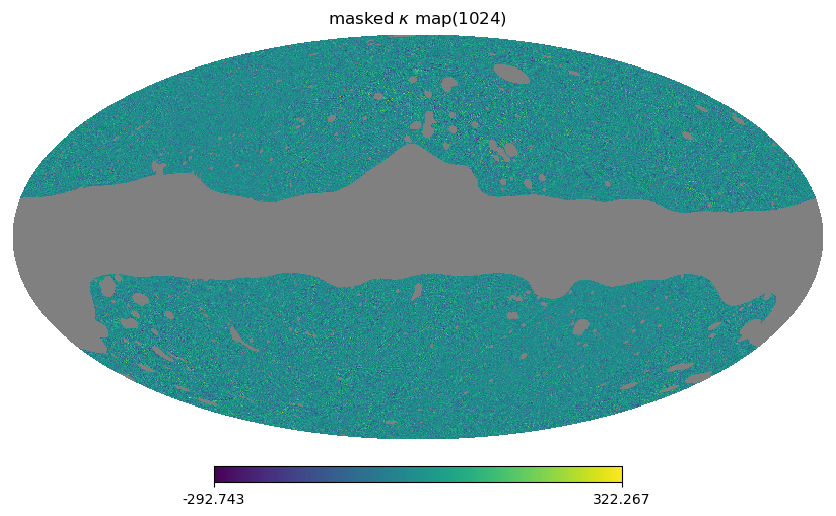

In [7]:
hp.mollview(image_masked_2.filled(), title='masked $\kappa$ map(1024)')

## BallTree

In [8]:
theta, phi = hp.pix2ang(nside=1024, ipix=np.arange(hp.nside2npix(1024)))
index = np.logical_not(image_masked_2.mask)

b = np.pi/2 - theta[index]
l = phi[index]
kappa = image_masked_2.data[index]

In [9]:
from sklearn.neighbors import BallTree
tree = BallTree(data=np.vstack((b, l)).T, leaf_size=5, metric='haversine')          # latitude + logtitude

In [10]:
result = tree.query_radius([[np.pi/4, np.pi*2-0.5], [np.pi/4, np.pi*2-0.5]], [1, 0.5])

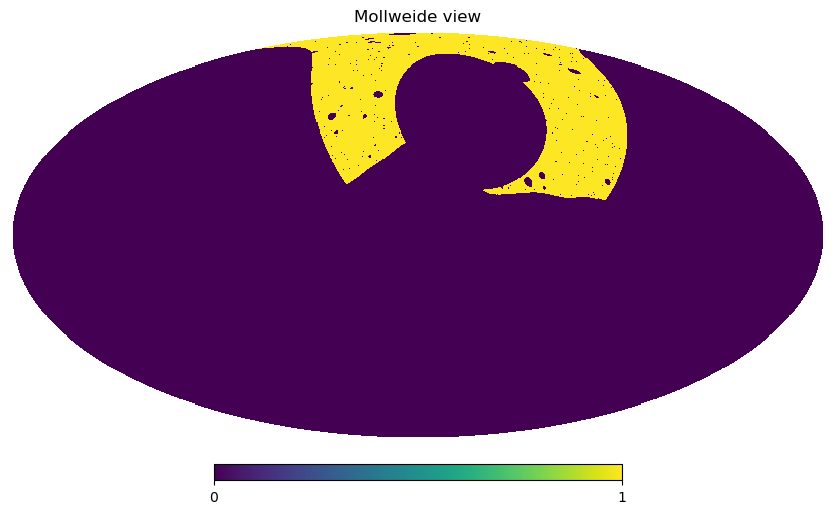

In [15]:
image_temp = np.zeros(hp.nside2npix(1024))
index = np.zeros(len(b), bool)
index[result[0]] = True
index[result[1]] = False
image_temp[hp.ang2pix(1024, np.pi/2-b[index], l[index])] = 1
hp.mollview(image_temp)

## Shuffle

In [3]:
Nside = 1024
mask = hp.read_map('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/data/Planck/mask/mask.fits')
dat = hp.read_alm('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/data/Planck/MV/dat_klm.fits')

image = hp.sphtfunc.alm2map(dat, nside=Nside, pol=False)
mask = hp.ud_grade(mask, Nside)
image_masked = hp.ma(image)
image_masked.mask = mask<=0.5
theta, phi = hp.pix2ang(Nside, np.arange(len(image)))
l_k = phi[np.logical_not(image_masked.mask)]
b_k = np.pi/2 - theta[np.logical_not(image_masked.mask)]
kappa = image[np.logical_not(image_masked.mask)]
# np.random.shuffle(kappa)
# np.save('../catalogue/CMB_shuffle_v3', [l_k, b_k, kappa])

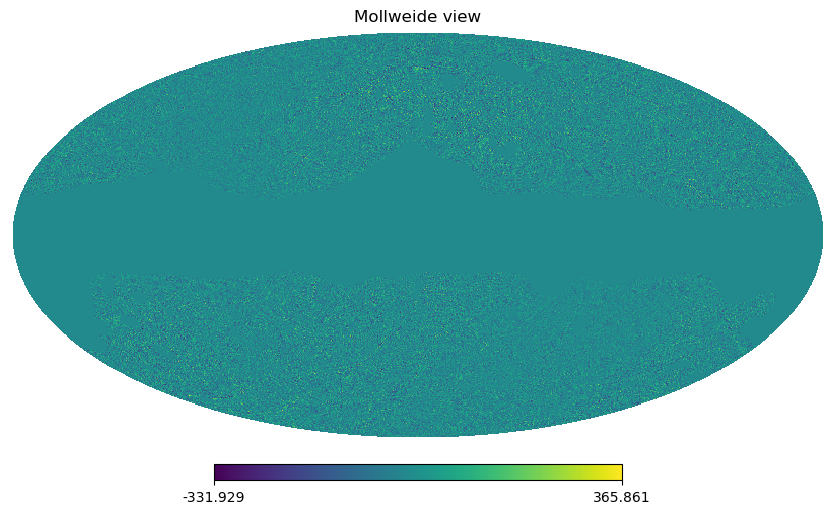

In [7]:
image = np.zeros(hp.nside2npix(1024))
image[hp.ang2pix(1024, theta=np.pi/2-b_k, phi=l_k)] = kappa
hp.mollview(image)

## noise kappa

In [4]:
Nside = 1024
mask = hp.read_map('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/data/Planck/mask/mask.fits')
dat = hp.read_alm('/uufs/astro.utah.edu/common/home/u6060319/quasar-CMBlening/data/Planck/MV/dat_klm.fits')

image = hp.sphtfunc.alm2map(dat, nside=Nside, pol=False)
mask = hp.ud_grade(mask, Nside)
image_masked = hp.ma(image)
image_masked.mask = mask<=0.5
theta, phi = hp.pix2ang(Nside, np.arange(len(image)))
l_k = phi[np.logical_not(image_masked.mask)]
b_k = np.pi/2 - theta[np.logical_not(image_masked.mask)]
kappa = image[np.logical_not(image_masked.mask)]

In [27]:
rand_num = np.random.uniform(0, 1, len(kappa))
kappa_resample = np.percentile(kappa, rand_num*100)

<Axes: ylabel='Count'>

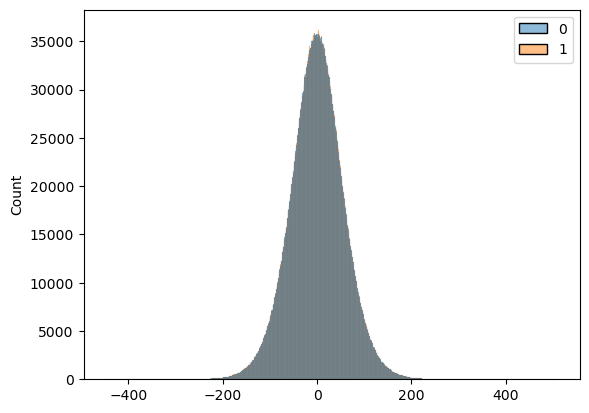

In [28]:
import seaborn as sns
sns.histplot([kappa, kappa_resample])

In [29]:
np.save('../catalogue/CMB_noise', [l_k, b_k, kappa_resample])